In [1]:
using QuantumOptics
using PyPlot

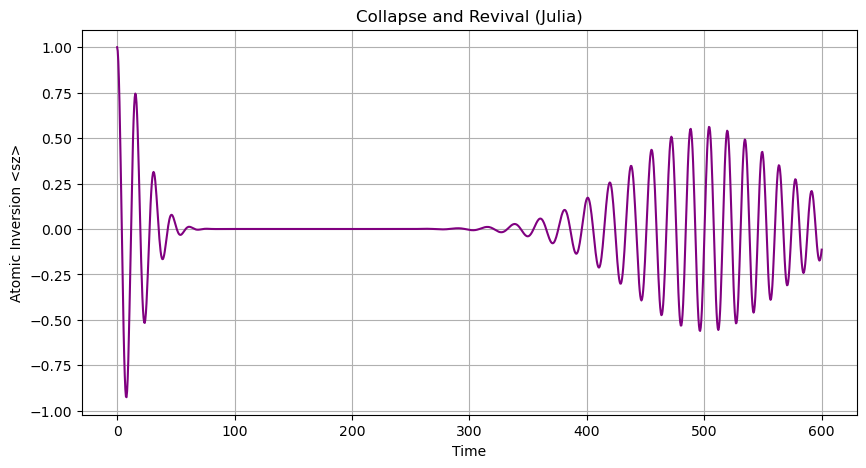

In [ ]:
# Parameters 
N = 60           
ω = 1.0
g = 0.05
α = sqrt(15)     

# Build System
b_cav = FockBasis(N)
b_atom = SpinBasis(1//2)

a = destroy(b_cav) ⊗ one(b_atom)
sm = one(b_cav) ⊗ sigmam(b_atom)
sz = one(b_cav) ⊗ sigmaz(b_atom)

H = ω*a'*a + 0.5*ω*sz + g*(a'*sm + a*sm')

# Initial State (Coherent)
psi0 = coherentstate(b_cav, α) ⊗ spinup(b_atom)

# Time Evolution
T = [0:0.5:600;]
tout, psi_t = timeevolution.schroedinger(T, psi0, H)

# Plotting
# We look at Atomic Inversion 
inversion = real(expect(sz, psi_t))

figure(figsize=(10, 5))
plot(tout, inversion, color="purple")

xlabel("Time")
ylabel("Atomic Inversion <sz>")
title("Collapse and Revival (Julia)")
grid(true)
display(gcf())